<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/textbook_practice/10_nn_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target==0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=1, penalty=None)
sgd_clf.fit(X,y)

y_pred2 = sgd_clf.predict([[2, 0.5]])
y_pred2

array([0])

- Perceptron 클래스는 위와 같은 속성을 가진 SGDClassifier와 동일하다.

In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.0'

### __케라스를 사용하여 데이터셋 적재하기__

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

- 784크기의 1D배열이 아니라 28X28 크기의 2D배열
- 픽셀이 정수(0에서 255까지) 표현되어 있음

valid set 만들기 & 픽셀의 강도를 0~1로 변환(자동으로 실수로 변환됨)

In [14]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

레이블의 클래스 이름을 리스트로 만들기

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

이미지 출력

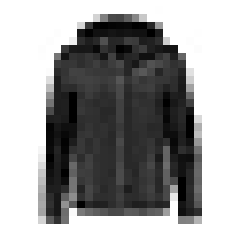

In [15]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [19]:
class_names[y_train[0]]

'Coat'

여러 이미지 출력

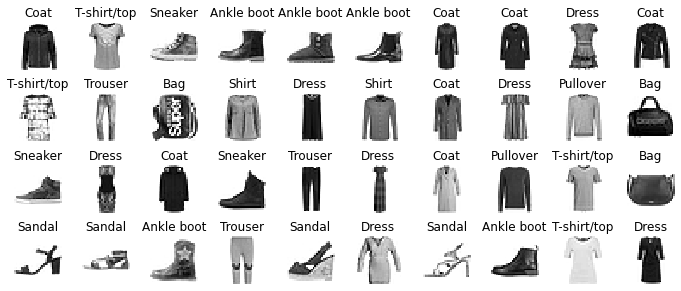

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

시퀀셜 API를 사용하여 모델 만들기

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

- Flatten 층은 입력 이미지(28x28)를 1D 배열로 변환한다.(즉, X를 입력 받으면 X.reshape(-1,1)
- 출력층의 활성화함수는 __softmax__(다중분류이므로)
- 만약 이진분류 문제라면 __activation="sigmoid"__

Sequential 모델을 만들 때 층의 리스트를 전달(위와 동일)

In [24]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
])

__summary()__ 메서드는 모델에 있는 모든 층을 출력

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


모델에 있는 층의 리스트를 출력하고, 인덱스로 층을 쉽게 선책 가능

In [27]:
model.layers

In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

이름으로 층을 선택

In [36]:
model.get_layer(hidden1.name) is hidden1

True

층의 모든 파라미터는 __get_weigths()__ 메서드와 __set_weights()__ 메서드를 사용해 접근 가능

In [39]:
weights, biases = hidden1.get_weights()
weights, weights.shape

(array([[-0.06120906, -0.07126912,  0.0223344 , ...,  0.04997908,
          0.0234363 , -0.04225201],
        [-0.05985545,  0.05610709,  0.02213975, ..., -0.04731663,
          0.01163358,  0.06184173],
        [-0.01774034, -0.05531598,  0.01017509, ...,  0.06843814,
          0.06228094,  0.07223414],
        ...,
        [-0.0106643 , -0.02768904, -0.06305087, ...,  0.04910477,
          0.040013  , -0.05657723],
        [ 0.01417659, -0.02698107, -0.05783769, ..., -0.0399774 ,
          0.0369929 , -0.00640803],
        [-0.00658268, -0.03602301, -0.0176161 , ..., -0.03707862,
          0.03773993, -0.03898397]], dtype=float32), (784, 300))

In [41]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

### 모델 컴파일

__compile()__ 메서드를 호출하여 손실함수와 옵티마이저를 지정

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

- 레이블이 0에서 9까지 정수이고, 클래스가 배타적이므로 __loss="sparse_categorical_crossentropy"__
- 만약 레이블이 클래스가 2일 때 [0, 0, 1, ..., 0]과 같이 one-hot 벡터라면, __loss="categorical_crossentropy"__
- 레이블이 이진분류라면, __loss="binary_crossentropy"__
- optimizer="sgd"는 확률적 경사하강법

SGD 옵티마이저에서 학습률 바꾸기

In [44]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=[keras.metrics.sparse_categorical_accuracy])

### 모델 훈련과 평가


In [45]:
history = model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9779 - sparse_categorical_accuracy: 0.6894 - val_loss: 0.5099 - val_sparse_categorical_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5010 - sparse_categorical_accuracy: 0.8273 - val_loss: 0.4569 - val_sparse_categorical_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4452 - sparse_categorical_accuracy: 0.8462 - val_loss: 0.4316 - val_sparse_categorical_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4193 - sparse_categorical_accuracy: 0.8509 - val_loss: 0.3947 - val_sparse_categorical_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3968 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.3806 - val_sparse_categorical_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3804 - spars

- 어떤 클래스는 많고 어떤 클래스는 적은 훈련 데이터라면(imblanced), __fit()__ 메서드를 호출할 때 __class_weight__ 매개변수를 지정하는 것이 좋다.(적게 등장하는 클래스는 높은 가중치, 많이 등장하는 클래스는 낮은 가중치)
- __sample_weight__ 매개변수를 지정하여 샘플별 가중치 조정 가능

__histroy__ 객체에는 훈련 파라미터(__history.params__), 수행된 에포크 리스트(__history.epoch__)가 포함되어있다. <br>
또한 훈련 세트와 검정 세트(있다면)에 대한 손실과 측정 지표를 담은 딕셔너리(__history.history__)가 있다. 다음과 같이 그림으로 그릴 수 있다.

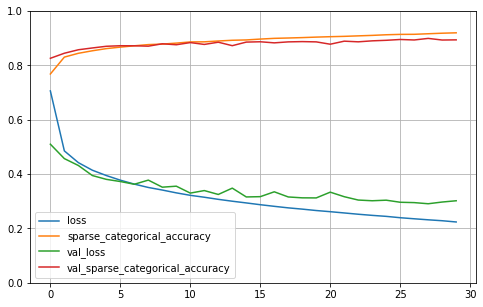

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

- 검증 손실은 에포크가 끝난 후에 계산되고, 훈련 손실은 에포크가 진행되는 동안 계산된다. 따라서 훈련 곡선은 에포크 절반 만큼 왼쪽으로 이동해서 봐야한다.
- 모델 성능이 만족스럽지 못하면 하이퍼파라미터를 튜닝해보자(학습률 우선으로)

상용 환경으로 배포하기 전, 테스트 세트로 모델을 평가하여 일반화 오차를 추정

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3278 - sparse_categorical_accuracy: 0.8858


[0.32776492834091187, 0.8858000040054321]

- 검증 세트에서 하이퍼파라미터 튜닝을 했으므로, 일반적으로 검증 세트보다 테스트 세트에서 성능이 조금 낮은 것이 일반적이다.
- 이 예제에선 튜닝과정이 없었기 때문에 테스트 세트의 성능이 낮은 것은 우연의 결과다.